<a href="https://colab.research.google.com/github/morymar/stuff/blob/main/FFT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
%matplotlib inline
import cmath
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from skimage.color import rgb2grey
from google.colab import drive
drive.mount('/content/drive')
color_image=imread("drive/My Drive/Colab Notebooks/510.png")
gray_image = rgb2grey(color_image) 
#plt.imshow(gray_image)
#plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [208]:

FFT=np.fft.fftshift(np.fft.fft2(gray_image))
x = (gray_image.shape[0])
y = (gray_image.shape[0])

FFT_rho=np.zeros((x, y))
FFT_phi=np.zeros((x, y))
for i in range (0,x):
  for j in range (0,y):
    FFT_phi[i][j]=cmath.phase(FFT[i][j])
    FFT_rho[i][j]=abs(FFT[i][j])
FFT_rho_del=np.zeros((x, y))


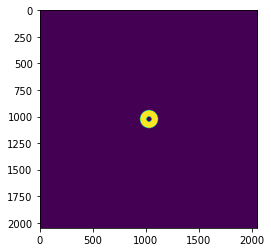

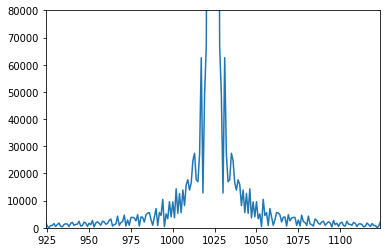

'for i in range(int(x/2), int(x/2+50)):\n  if FFT_rho[int(x/2)][i]<FFT_rho[int(x/2)][i+1]:\n    print (i)'

In [219]:
wel=54
wed=60
mask = np.zeros((x,y))
cv2.ellipse(mask, (int(x/2),int(y/2)), (wel,wel), 0, 0, 360, 1, wed)
plt.imshow(mask)
plt.show()

s=np.zeros(x)
for i in range(0, x):
  s[i]=i

   
fig, ax = plt.subplots()
#plt.plot(s, mask[int(x/2)])
plt.plot(s, FFT_rho[int(x/2)])
plt.axis([int(x/2-100), int(x/2+100), -1, 80000])
plt.show()



"""for i in range(int(x/2), int(x/2+50)):
  if FFT_rho[int(x/2)][i]<FFT_rho[int(x/2)][i+1]:
    print (i)"""

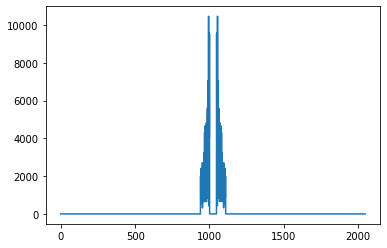

In [221]:
FFT_rho_del=np.zeros((x, y))
for i in range(0,x):
  for j in range(0,y):
    FFT_rho_del[i][j]=FFT_rho[i][j]*mask[i][j]

"""
rest_out=600
rest_in=100
for i in range (int(x/2-rest_out), int(x/2-rest_in)):
  for j in range(int(y/2-rest_out),int(y/2+rest_out) ):
    FFT_rho_del[i][j]=FFT_rho[i][j]

for i in range (int(x/2-rest_in), int(x/2+rest_in)):
  for j in range(int(y/2-rest_out),int(y/2-rest_in) ):
    FFT_rho_del[i][j]=FFT_rho[i][j]
  for j in range(int(y/2+rest_in),int(y/2+rest_out) ):
    FFT_rho_del[i][j]=FFT_rho[i][j]

for i in range (int(x/2+rest_in), int(x/2+rest_out)):
  for j in range(int(y/2-rest_out),int(y/2+rest_out) ):
    FFT_rho_del[i][j]=FFT_rho[i][j]"""

s=np.zeros(x)
for i in range(0, x):
  s[i]=i

fig, ax = plt.subplots()
plt.plot(s , FFT_rho_del[int(x/2)])
#plt.plot(s, FFT_rho[int(x/2)])
#plt.axis([int(x/2-200), int(x/2+200), -1, 10000])
plt.show()


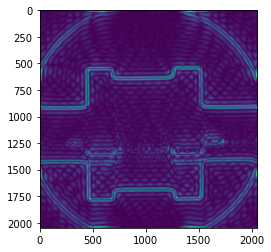

In [222]:
import skimage.io  as io
from skimage import img_as_ubyte
result_FFT=np.full((x,y), 0+0j)
for i in range(0,x):
  for j in range(0,y):
    result_FFT[i][j]=cmath.rect(FFT_rho_del[i][j], FFT_phi[i][j])
result=abs(np.fft.ifft2(result_FFT))
plt.imshow(result)
#imsave(io.path.join("drive/My Drive/Colab Notebooks/","res.png"%i),img_as_ubyte(result))
imsave('drive/My Drive/Colab Notebooks/res_1.png', img_as_ubyte(result))
#plt.figure(figsize=(18, 18))
plt.show()